# Objective of the Case: 
Simple Problem- Predict the price of Flights. Study the different variables, analyze the case, use alogorithms to predict the price of flight ticket as accurately as possible.

# # #Begin with importing the basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [2]:
dataset = pd.read_csv("laptop_price.csv")

In [3]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
dataset = dataset.drop("Unnamed: 0",axis = 1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
dataset.shape

(1303, 11)

In [8]:
dataset.duplicated().sum()

29

# Pre-Processing

# Step1: Null Value Analysis

In [9]:
dataset.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
# No Null Value to Show

# This particular case has lot of long String based variables, which requires extensive feature engineering in order to draw some meaningful insights

# Pre-Processing Step-2

In [11]:
# Lets convert RAM into a Numerical Feature
dataset["Ram"] = dataset["Ram"].str.replace("GB","")

In [12]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
# Like RAM convert weight into Numerical Feature
dataset["Weight"] = dataset["Weight"].str.replace("kg","")

In [14]:
# From the screenresolution variable lets see if we have Touch screen and IPS availablle:Yes or No.
# We will do the price comparison as well in EDA

In [15]:
dataset["Touchscreen"] = dataset["ScreenResolution"].apply(lambda x:1 if "TouchScreen" in x else 0 )

In [16]:
dataset["IPS"] = dataset["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [17]:
dataset["X_res"] = dataset["ScreenResolution"].str.split("x",expand = True)[1]

In [18]:
dataset["A_res"] = dataset["ScreenResolution"].str.split("x",expand = True)[0]

In [19]:
dataset["A_res"]= dataset["A_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [20]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [21]:
dataset["A_res"] = dataset["A_res"].astype("int32")

In [22]:
dataset["X_res"] = dataset["X_res"].astype("int32")

In [23]:
# Lets take out PPI-Pixel Per Inch and another important feature to determine price

In [24]:
dataset["PPI"] = (((dataset["A_res"]**2) + (dataset["X_res"]**2))**.5/dataset["Inches"]).round(decimals=0).astype("float")

In [25]:
# Now we have extratcted enough information from Screen Resolution lets' drop the column

In [26]:
dataset= dataset.drop(["ScreenResolution"],axis =1)

In [27]:
#Identify the Brands of CPU

In [28]:
dataset["CPU"] = dataset["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [29]:
# While it is know case that processors will be of intel or AMD, we want to see if they are in i series, or AMD or any other.
# We will write a function to check that

In [30]:
def CPU(Processors):
    if Processors == "Intel Core i3" or Processors == "Intel Core i5" or Processors =="Intel Core i7":
        return Processors
    if Processors.split()[0] =="Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [31]:
dataset["CPU Brand"] = dataset["CPU"].apply(CPU)

In [32]:
# Drop the Feature
dataset = dataset.drop(["Cpu","CPU"], axis =1)

In [33]:
dataset["GPU"] = dataset["Gpu"].apply(lambda x:" ".join((x.split()[0:1])))

In [34]:
dataset = dataset.drop(["Gpu"],axis =1)

In [35]:
dataset["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [36]:
def OPS(text):
    if text.split(" ")[0] == "Windows":
        return "Windows"
    if text == "macOS" or text =="Mac OS X":
        return "Mac"
    if text =="Linux":
        return "Linux"
    else:
        return "Other"

In [37]:
dataset["OpSys"]= dataset["OpSys"].apply(OPS)

In [38]:
dataset.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res,PPI,CPU Brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Mac,1.37,71378.6832,0,1,1600,2560,227.0,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Mac,1.34,47895.5232,0,0,900,1440,128.0,Intel Core i5,Intel
2,HP,Notebook,15.6,8,256GB SSD,Other,1.86,30636.0000,0,0,1080,1920,141.0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,Mac,1.83,135195.3360,0,1,1800,2880,221.0,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,Mac,1.37,96095.8080,0,1,1600,2560,227.0,Intel Core i5,Intel


In [39]:
# For Memory finding a complicated task is required which is shown below

In [40]:
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')
new = dataset["Memory"].str.split("+", n = 1, expand = True)

dataset["first"]= new[0]
dataset["first"]=dataset["first"].str.strip()

dataset["second"]= new[1]

dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['first'] = dataset['first'].str.replace(r'\D', '')

dataset["second"].fillna("0", inplace = True)

dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['second'] = dataset['second'].str.replace(r'\D', '')

dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)

dataset["HDD"]=(dataset["first"]*dataset["Layer1HDD"]+dataset["second"]*dataset["Layer2HDD"])
dataset["SSD"]=(dataset["first"]*dataset["Layer1SSD"]+dataset["second"]*dataset["Layer2SSD"])
dataset["Hybrid"]=(dataset["first"]*dataset["Layer1Hybrid"]+dataset["second"]*dataset["Layer2Hybrid"])
dataset["Flash_Storage"]=(dataset["first"]*dataset["Layer1Flash_Storage"]+dataset["second"]*dataset["Layer2Flash_Storage"])

dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [41]:
dataset.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res,PPI,CPU Brand,GPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Mac,1.37,71378.6832,0,1,1600,2560,227.0,Intel Core i5,Intel,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Mac,1.34,47895.5232,0,0,900,1440,128.0,Intel Core i5,Intel,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Other,1.86,30636.0000,0,0,1080,1920,141.0,Intel Core i5,Intel,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,Mac,1.83,135195.3360,0,1,1800,2880,221.0,Intel Core i7,AMD,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Mac,1.37,96095.8080,0,1,1600,2560,227.0,Intel Core i5,Intel,0,256,0,0


In [42]:
dataset = dataset.drop(["Memory"], axis =1)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   object 
 6   Price          1303 non-null   float64
 7   Touchscreen    1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   X_res          1303 non-null   int32  
 10  A_res          1303 non-null   int32  
 11  PPI            1303 non-null   float64
 12  CPU Brand      1303 non-null   object 
 13  GPU            1303 non-null   object 
 14  HDD            1303 non-null   int64  
 15  SSD            1303 non-null   int64  
 16  Hybrid         1303 non-null   int64  
 17  Flash_Storage  1303 non-null   int64  
dtypes: float

In [44]:
# Convert the numerical form object variable to int/float.

In [45]:
dataset["Ram"] = dataset["Ram"].astype("int32")

In [46]:
dataset["Weight"] = dataset["Weight"].astype("float")

# Done with feature engineering and extraction which has been a little complicated task here.

# Pre-Processing Step-3: Outlier Identification

In [47]:
#Lets begin with statistical Analysis

In [48]:
dataset.describe()

,Inches,Ram,Weight,Price,Touchscreen,IPS,X_res,A_res,PPI,HDD,SSD,Hybrid,Flash_Storage
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,0.0,0.280123,1070.830391,1894.784344,146.442057,413.783576,183.732924,8.831926,4.555641
std,1.426304,5.084665,0.665475,37243.201786,0.0,0.449231,284.519410,494.641028,43.197999,515.818779,186.966903,92.567185,30.274090
min,10.100000,2.000000,0.690000,9270.720000,0.0,0.000000,768.000000,1366.000000,91.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,31914.720000,0.0,0.000000,900.000000,1600.000000,127.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,52054.560000,0.0,0.000000,1080.000000,1920.000000,141.000000,0.000000,256.000000,0.000000,0.000000
75%,15.600000,8.000000,2.300000,79274.246400,0.0,1.000000,1080.000000,1920.000000,157.000000,1000.000000,256.000000,0.000000,0.000000
max,18.400000,64.000000,4.700000,324954.720000,0.0,1.000000,2160.000000,3840.000000,352.000000,2000.000000,1024.000000,1000.000000,512.000000


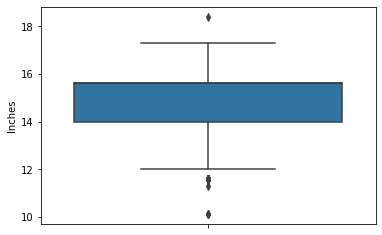

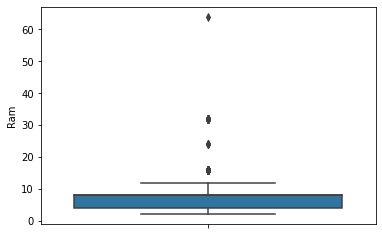

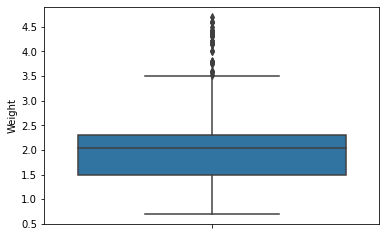

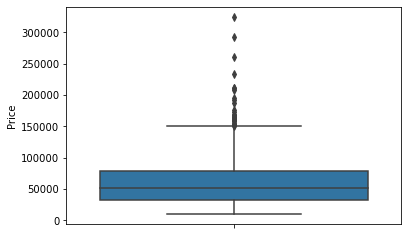

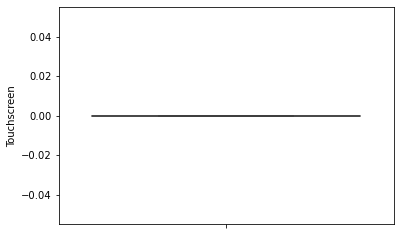

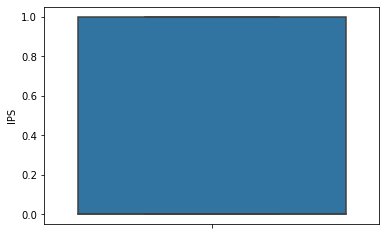

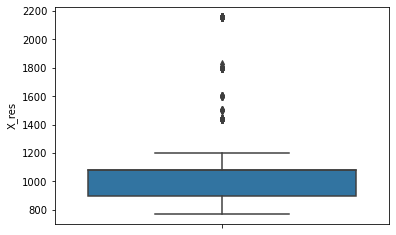

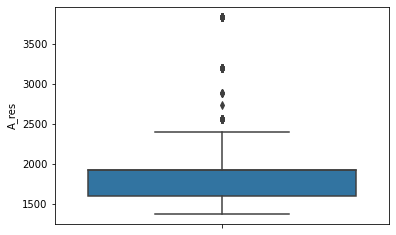

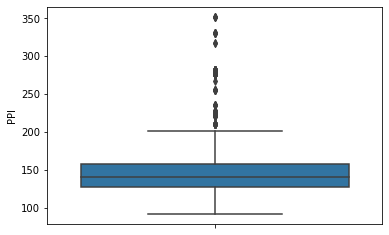

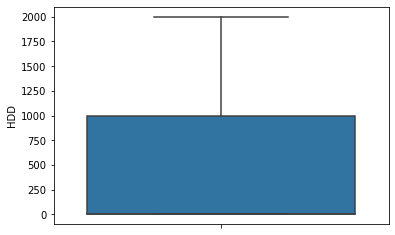

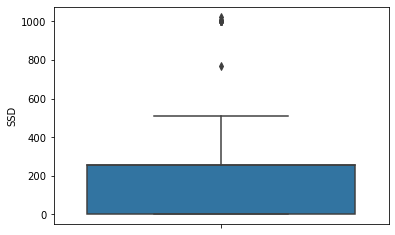

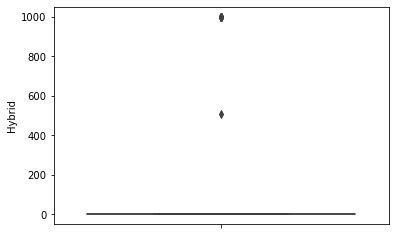

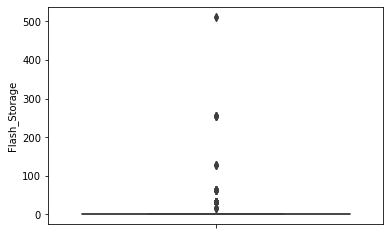

In [49]:
for i in dataset.columns:
    if dataset[i].dtype != "O":
        sns.boxplot(y = i,data = dataset)
        plt.show()

In [50]:
#Not Treating Outlier as it doesnt look like there any major outliers

# EDA

In [51]:
Numerical_Features=[feature for feature in dataset.columns if dataset[feature].dtype !="O"]

In [52]:
Categorical_Features=[feature for feature in dataset.columns if dataset[feature].dtype =="O"]

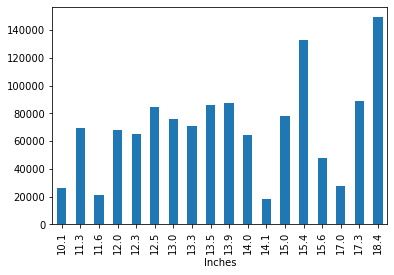

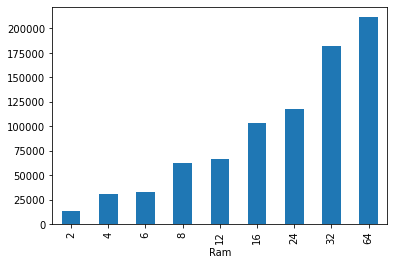

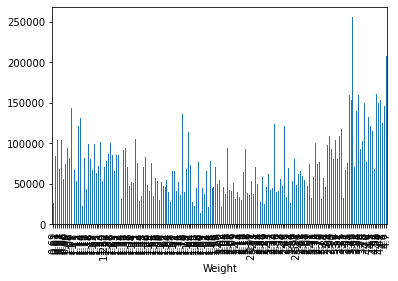

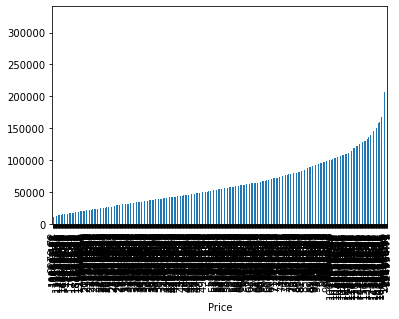

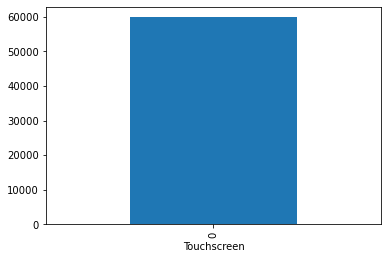

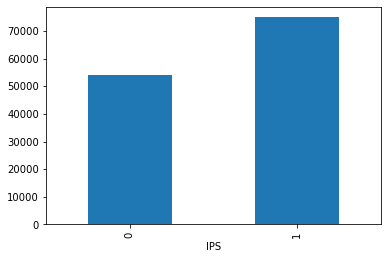

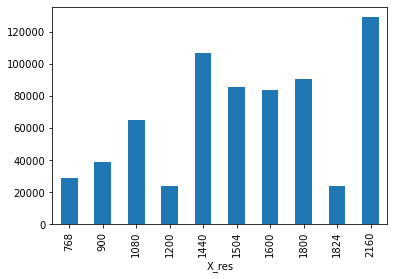

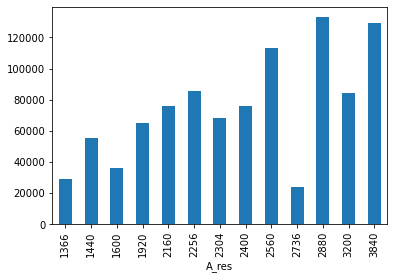

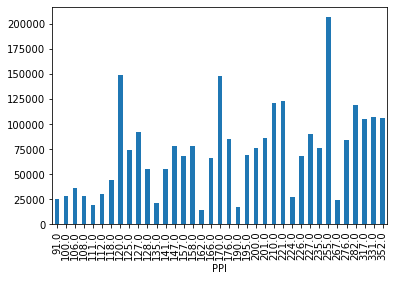

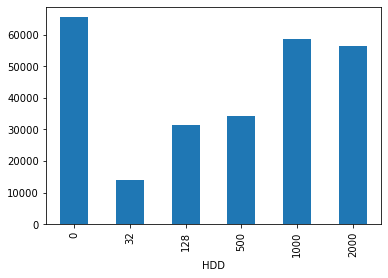

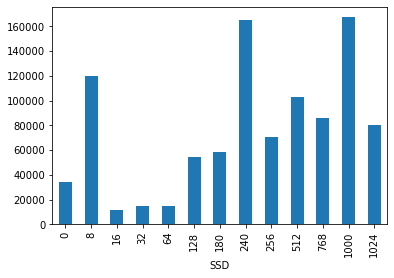

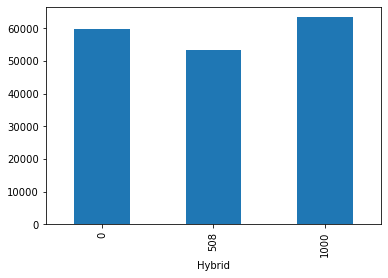

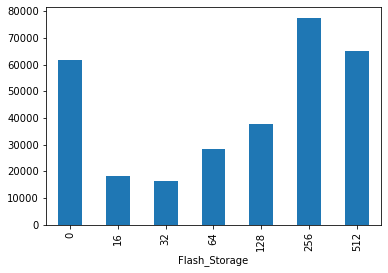

In [53]:
for feature in Numerical_Features:
        dataset.groupby(feature)["Price"].mean().plot(kind = "bar")
        plt.show()

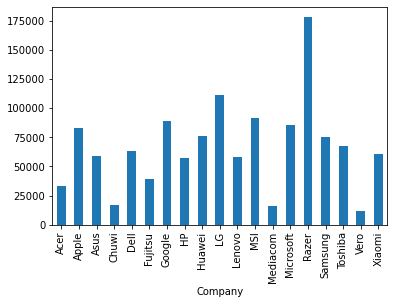

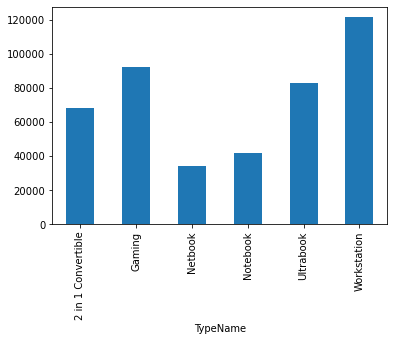

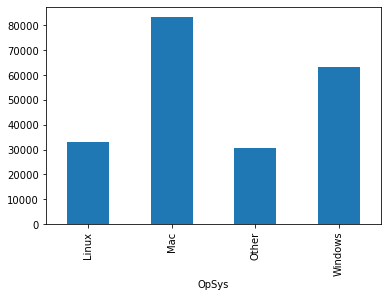

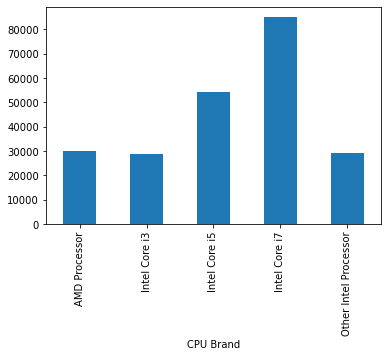

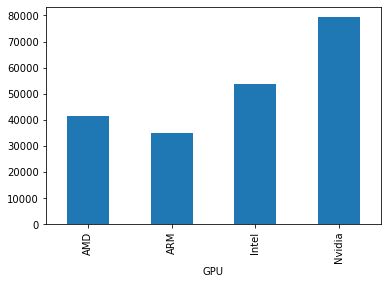

In [54]:
for feature in Categorical_Features:
        dataset.groupby(feature)["Price"].mean().plot(kind = "bar")
        plt.show()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

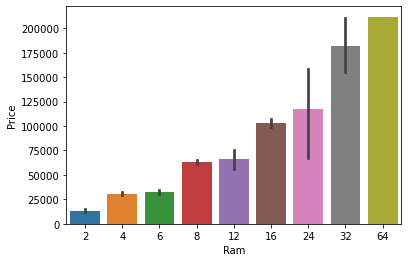

In [55]:
sns.barplot(x = dataset["Ram"],y = dataset["Price"])

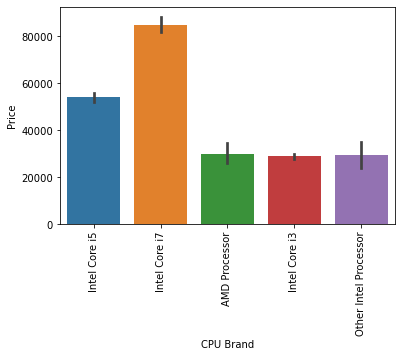

In [56]:
sns.barplot(x = dataset["CPU Brand"], y = dataset["Price"])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

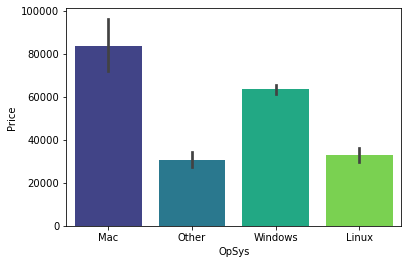

In [57]:
sns.barplot(x=dataset["OpSys"], y ="Price",data= dataset, palette = "viridis", saturation = 4)

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

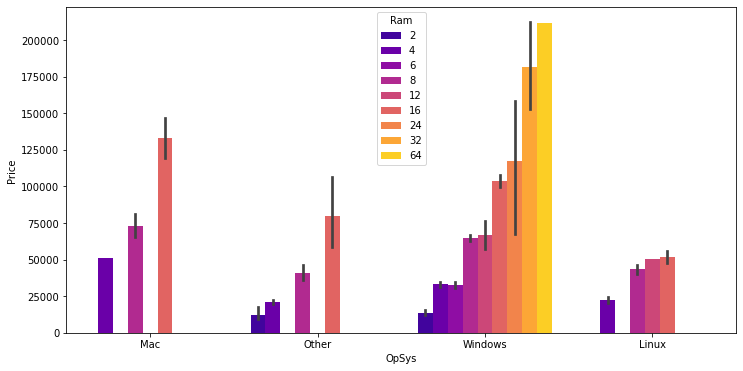

In [58]:
plt.figure(figsize =(12,6))
sns.barplot(x=dataset["OpSys"], y ="Price", hue = "Ram", data= dataset, palette = "plasma", saturation = 4)

In [59]:
# Windows laptop with 64GB and 32GB Ram are most expensive

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

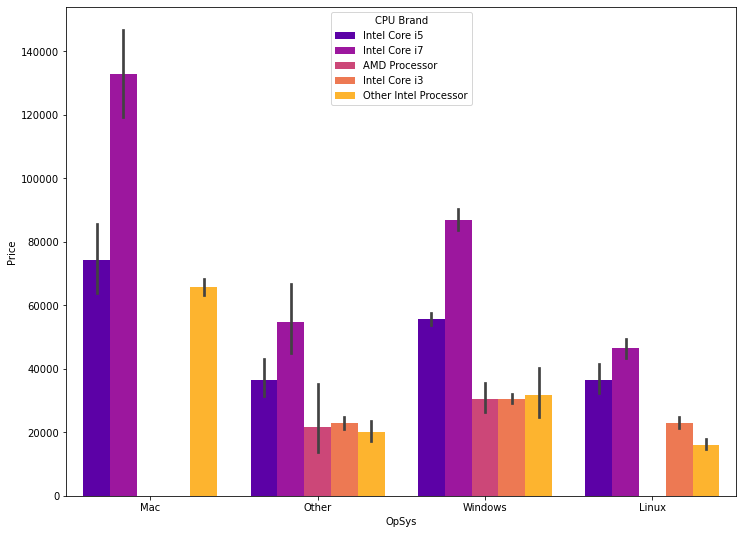

In [60]:
plt.figure(figsize = (12,9))
sns.barplot(x=dataset["OpSys"], y ="Price", hue = "CPU Brand", data= dataset, palette = "plasma", saturation = 4)

In [61]:
# As expected intel core i7 are most expensive, mac with core i7 tops the table

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

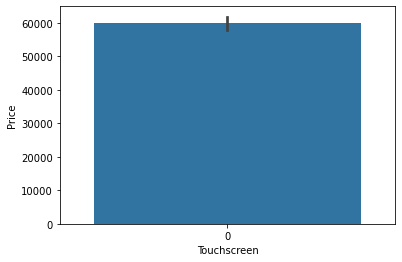

In [62]:
sns.barplot(x = dataset["Touchscreen"], y = dataset["Price"])

<AxesSubplot:xlabel='IPS', ylabel='Price'>

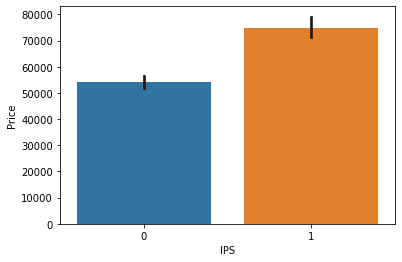

In [63]:
sns.barplot(x=dataset["IPS"], y = dataset["Price"],  errcolor='.1')

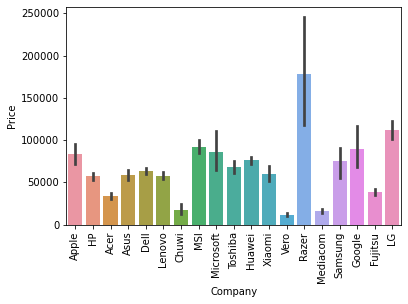

In [64]:
sns.barplot(x=dataset["Company"],y = dataset["Price"])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

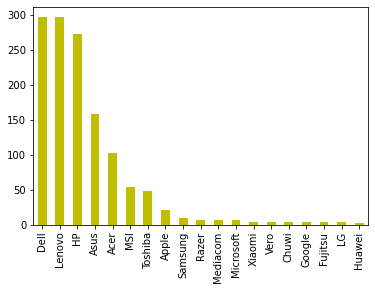

In [65]:
dataset["Company"].value_counts().plot(kind = "bar", color = "y")

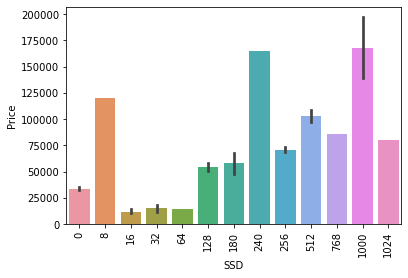

In [66]:
sns.barplot(x=dataset["SSD"],y = dataset["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
dataset.corr()["Price"].sort_values(ascending = False)

Price            1.000000
Ram              0.743007
SSD              0.670799
A_res            0.556529
X_res            0.552809
PPI              0.473579
IPS              0.252208
Weight           0.210370
Inches           0.068197
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Touchscreen           NaN
Name: Price, dtype: float64

<AxesSubplot:xlabel='Hybrid', ylabel='Price'>

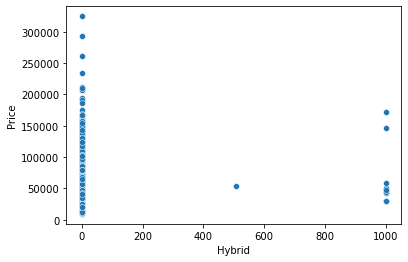

In [68]:
sns.scatterplot(x= dataset["Hybrid"], y = dataset["Price"])

<AxesSubplot:xlabel='Flash_Storage', ylabel='Price'>

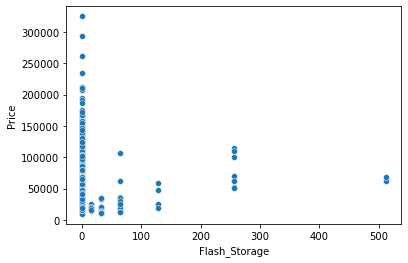

In [69]:
sns.scatterplot(x= dataset["Flash_Storage"], y = dataset["Price"])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

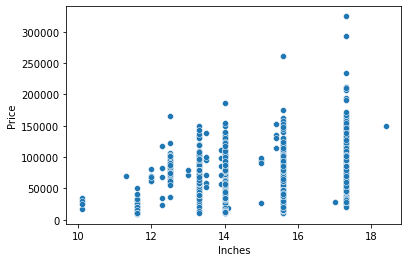

In [70]:
sns.scatterplot(x= dataset["Inches"], y = dataset["Price"])

<AxesSubplot:xlabel='HDD', ylabel='Price'>

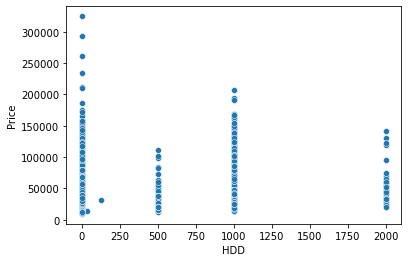

In [71]:
sns.scatterplot(x= dataset["HDD"], y = dataset["Price"])

In [72]:
dataset = dataset.drop(["HDD","Hybrid"], axis =1)

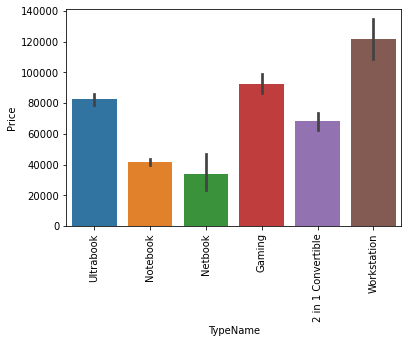

In [73]:
sns.barplot(x=dataset["TypeName"],y = dataset["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

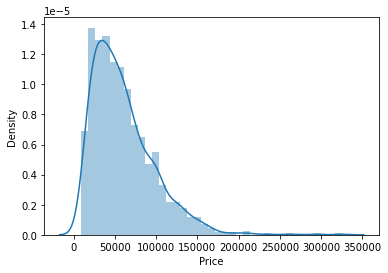

In [74]:
sns.distplot(dataset["Price"])

# Pre-Processing: Step-4: Encoding/One Hot Encoding

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int32  
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Price          1303 non-null   float64
 7   Touchscreen    1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   X_res          1303 non-null   int32  
 10  A_res          1303 non-null   int32  
 11  PPI            1303 non-null   float64
 12  CPU Brand      1303 non-null   object 
 13  GPU            1303 non-null   object 
 14  SSD            1303 non-null   int64  
 15  Flash_Storage  1303 non-null   int64  
dtypes: float64(4), int32(3), int64(4), object(5)
memory usage: 147.7+ KB


In [76]:
dataset = pd.get_dummies(dataset, columns= ["Company","TypeName","CPU Brand","OpSys","GPU"],drop_first = True)

<AxesSubplot:>

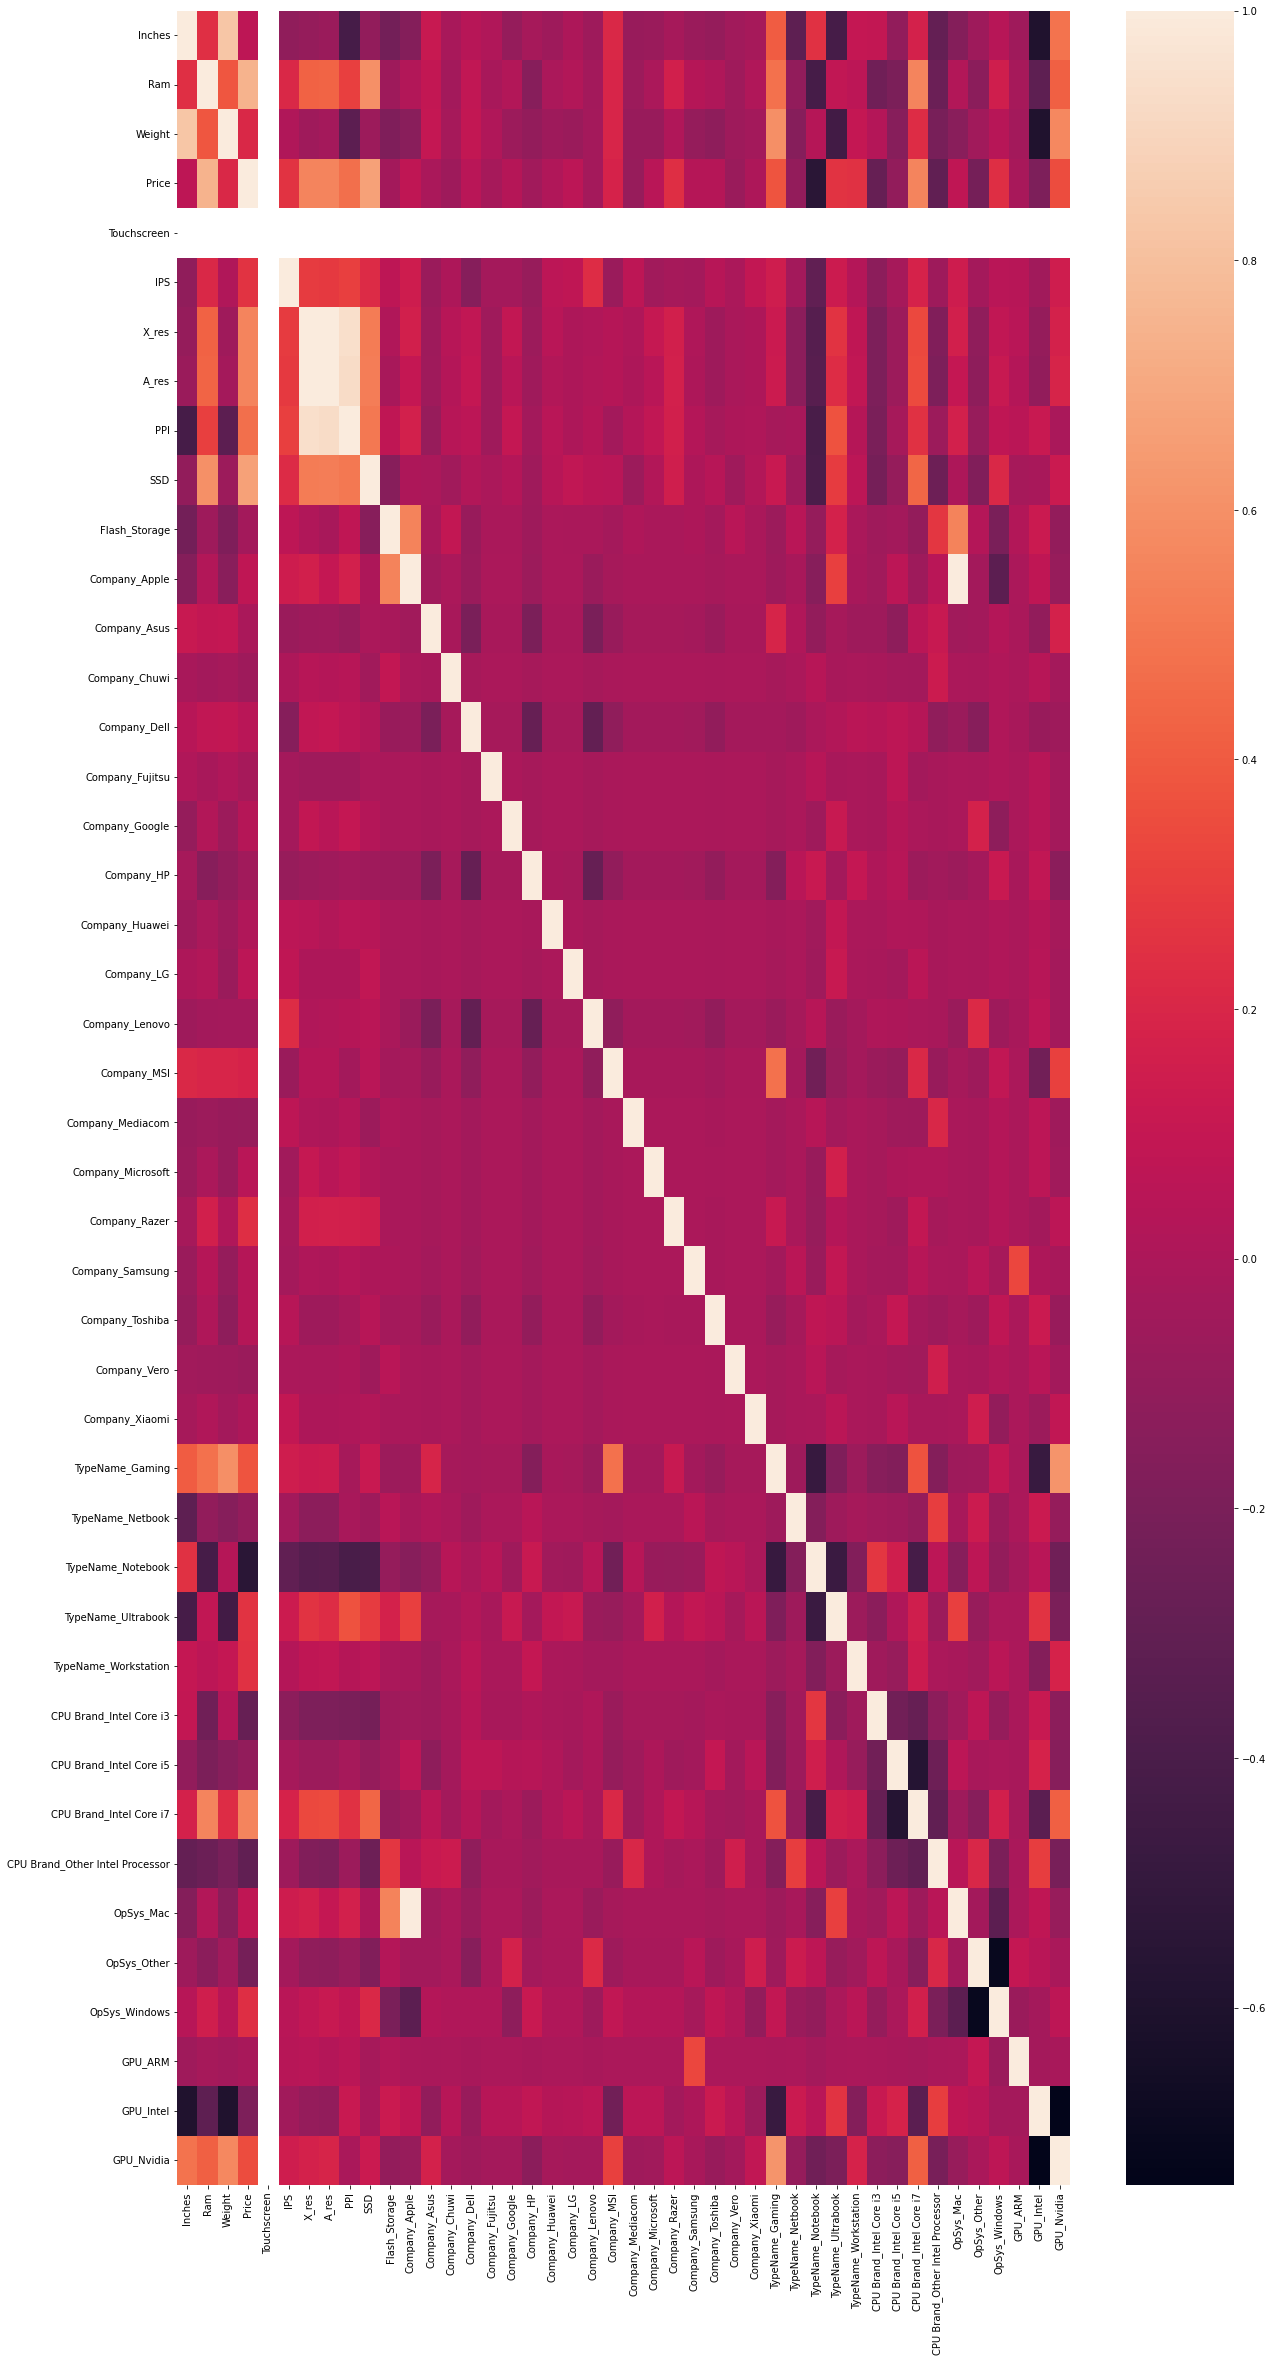

In [77]:
plt.figure(figsize = (20,40))
sns.heatmap(dataset.corr())

# Spliting the Dataset into X and Y

In [78]:
x = dataset.drop(["Price"], axis =1)
y = dataset["Price"]

# Splitting Into Train and Test

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.75,random_state = 101)

# Model Applications

# Model-1: OLS-Linear Regression 

In [80]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [81]:
dataset.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'X_res',
       'A_res', 'PPI', 'SSD', 'Flash_Storage', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'CPU Brand_Intel Core i3',
       'CPU Brand_Intel Core i5', 'CPU Brand_Intel Core i7',
       'CPU Brand_Other Intel Processor', 'OpSys_Mac', 'OpSys_Other',
       'OpSys_Windows', 'GPU_ARM', 'GPU_Intel', 'GPU_Nvidia'],
      dtype='object')

In [82]:
pd.set_option("display.max_columns",None)

In [83]:
x_train

,Inches,Ram,Weight,Touchscreen,IPS,X_res,A_res,PPI,SSD,Flash_Storage,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,CPU Brand_Other Intel Processor,OpSys_Mac,OpSys_Other,OpSys_Windows,GPU_ARM,GPU_Intel,GPU_Nvidia
290,15.6,2,2.19,0,0,768,1366,100.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
757,15.6,8,2.59,0,0,1080,1920,141.0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
762,12.3,8,1.10,0,0,1600,2400,235.0,256,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
121,15.6,16,1.80,0,0,1080,1920,141.0,256,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
532,15.6,8,2.00,0,1,2160,3840,282.0,256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,14.0,4,1.40,0,0,1080,1920,157.0,32,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
973,14.0,8,1.95,0,0,1080,1920,157.0,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
75,15.6,8,2.20,0,0,1080,1920,141.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
599,15.6,8,2.06,0,0,1080,1920,141.0,256,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [84]:
reg_model = smf.OLS(endog = y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              393.0
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        19:52:17   Log-Likelihood:                         -10897.
No. Observations:                 977   AIC:                                  2.187e+04
Df Residuals:                     938   BIC:                                  2.206e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inches                          -2790.8614    444.616     -6.277      0.000   -3663.419   -1918.304
Ram                              2456.9197    196.014     12.534      0.000    2072.243    2841.597
Weight                           1.394e+04   1991.149      7.000      0.000       1e+04    1.78e+04
Touchscreen                     -6.955e-08   3.11e-08     -2.234      0.026   -1.31e-07   -8.46e-09
IPS                              1733.1527   1502.434      1.154      0.249   -1215.368    4681.673
X_res                              26.8445     63.968      0.420      0.675     -98.692     152.381
A_res                              -3.9807     35.196     -0.113      0.910     -73.053      65.092
PPI                                 4.5503     74.217      0.061      0.951    -141.100     150.201
SSD                                42.9357      4.712      9.111      0.000      33.688      52.184
Flash_Storage                      18.9612     27.461      0.690      0.490     -34.931      72.853
Company_Apple                    8383.6942   5679.965      1.476      0.140   -2763.217    1.95e+04
Company_Asus                     3815.2211   2707.833      1.409      0.159   -1498.891    9129.334
Company_Chuwi                    -7.44e-12   2.03e-11     -0.366      0.715   -4.73e-11    3.25e-11
Company_Dell                     6571.6262   2505.974      2.622      0.009    1653.662    1.15e+04
Company_Fujitsu                 -4272.2191   1.25e+04     -0.343      0.732   -2.87e+04    2.02e+04
Company_Google                   1.318e+04   1.88e+04      0.700      0.484   -2.38e+04    5.01e+04
Company_HP                       1.194e+04   2459.140      4.856      0.000    7116.124    1.68e+04
Company_Huawei                  -3325.0276   1.89e+04     -0.176      0.860   -4.04e+04    3.38e+04
Company_LG                       2.466e+04   1.27e+04      1.941      0.053    -269.454    4.96e+04
Company_Lenovo                   6167.6308   2368.997      2.603      0.009    1518.483    1.08e+04
Company_MSI                        1.7e+04   4074.354      4.173      0.000    9007.503     2.5e+04
Company_Mediacom                -6291.0784   7142.657     -0.881      0.379   -2.03e+04    7726.359
Company_Microsoft                9884.7658   1.95e+04      0.506      0.613   -2.85e+04    4.82e+04
Company_Razer                    1.154e+05   1.08e+04     10.689      0.000    9.42e+04    1.37e+05
Company_Samsung                  1.875e+04   7118.771      2.634      0.009    4778.537    3.27e+04
Company_Toshiba                  1.693e+04   3622.548      4.674      0.000    9823.395     2.4e+04
Company_Vero                    -4237.9021   1.03e+04     -0.410      0.682   -2.45e

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

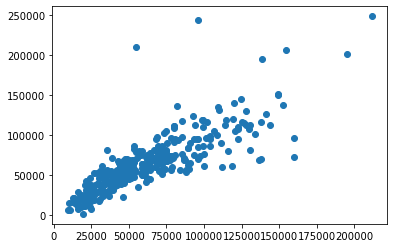

In [87]:
plt.scatter(y_test, y_pred)

In [88]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [89]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)

In [90]:
from sklearn.metrics import r2_score 

In [91]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_test))

Training result:  0.7991662002920554
########################################################################################################################
Test result:  0.6404923709529473


In [92]:
from sklearn import metrics

In [93]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred))

MAE 13765.176372288315


In [94]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 21472.431692815404


In [95]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.25258693633848195


# Considering the Log of Price

In [96]:
Y = np.log(dataset["Price"])

In [97]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,train_size=.75,random_state = 101)

In [99]:
reg_model_v1 = smf.OLS(endog = Y_train, exog= x_train).fit()
reg_model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.868e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        19:52:18   Log-Likelihood:                         -252.36
No. Observations:                 977   AIC:                                      582.7
Df Residuals:                     938   BIC:                                      773.2
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inches                              0.6138      0.008     74.430      0.000       0.598       0.630
Ram                                 0.0283      0.004      7.784      0.000       0.021       0.035
Weight                             -0.0040      0.037     -0.109      0.913      -0.076       0.068
Touchscreen                     -8.932e-13   5.77e-13     -1.547      0.122   -2.03e-12     2.4e-13
IPS                                 0.0756      0.028      2.713      0.007       0.021       0.130
X_res                              -0.0070      0.001     -5.898      0.000      -0.009      -0.005
A_res                              -0.0003      0.001     -0.416      0.678      -0.002       0.001
PPI                                 0.0563      0.001     40.877      0.000       0.054       0.059
SSD                                 0.0007   8.74e-05      8.270      0.000       0.001       0.001
Flash_Storage                       0.0007      0.001      1.361      0.174      -0.000       0.002
Company_Apple                       0.5987      0.105      5.683      0.000       0.392       0.805
Company_Asus                        0.1118      0.050      2.226      0.026       0.013       0.210
Company_Chuwi                   -2.539e-17   3.77e-16     -0.067      0.946   -7.66e-16    7.15e-16
Company_Dell                        0.1981      0.046      4.261      0.000       0.107       0.289
Company_Fujitsu                    -0.1223      0.231     -0.529      0.597      -0.576       0.332
Company_Google                      1.1557      0.349      3.308      0.001       0.470       1.841
Company_HP                          0.2106      0.046      4.617      0.000       0.121       0.300
Company_Huawei                      1.0563      0.351      3.012      0.003       0.368       1.745
Company_LG                          0.3443      0.236      1.461      0.144      -0.118       0.807
Company_Lenovo                      0.1282      0.044      2.918      0.004       0.042       0.214
Company_MSI                         0.1709      0.076      2.261      0.024       0.023       0.319
Company_Mediacom                   -0.2165      0.132     -1.634      0.103      -0.477       0.044
Company_Microsoft                   1.4230      0.362      3.927      0.000       0.712       2.134
Company_Razer                       1.0242      0.200      5.114      0.000       0.631       1.417
Company_Samsung                     0.3944      0.132      2.987      0.003       0.135       0.654
Company_Toshiba                     0.3765      0.067      5.603      0.000       0.245       0.508
Company_Vero                       -0.4661      0.192     -2.429      0.015      -0.

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [101]:
y_pred_log = model.predict(x_test)

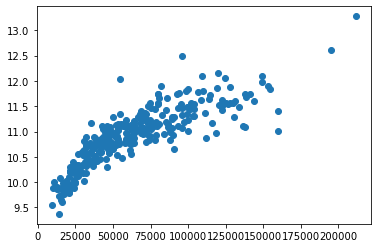

In [102]:
plt.scatter(y_test, y_pred_log)

In [103]:
linear_model = LinearRegression()
linear_model.fit(x_train, Y_train)

LinearRegression()

In [104]:
y_pred_train_log = linear_model.predict(x_train)
y_pred_test_log = linear_model.predict(x_test)

In [105]:
print("Training result: ", r2_score(y_train, y_pred_train_log))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_test_log))

Training result:  -2.483639218794659
########################################################################################################################
Test result:  -2.929924472588774


In [106]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred_log))

MAE 61299.575024737765


In [107]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_log)))

RMSE: 70993.6126029895


In [108]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_log))

MAPE: 0.9997491721346067


# Regularizations

In [109]:
#Lasso

In [110]:
from sklearn.linear_model import Lasso
import statsmodels.api as sma

In [111]:
from sklearn.feature_selection import SelectFromModel

In [112]:
feature_selection = SelectFromModel(Lasso(alpha=0.1,random_state=101))

In [113]:
x1 = dataset.drop(["Price"],axis=1)
y1 = dataset["Price"]

In [114]:
feature_selection.fit(x1,y1)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=101))

In [115]:
selected_features= x1.columns[(feature_selection.get_support())]

#Print Details

print("Total Features:{}".format(x1.shape[1]))
print("Selected Features:{}".format(len(selected_features)))

Total Features:43
Selected Features:41


In [116]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=101)

In [117]:
Reg_Model = smf.OLS(endog = y1_train, exog = x1_train).fit()
Reg_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              382.5
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        19:52:19   Log-Likelihood:                         -10156.
No. Observations:                 912   AIC:                                  2.039e+04
Df Residuals:                     873   BIC:                                  2.058e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inches                          -3127.2815    452.745     -6.907      0.000   -4015.878   -2238.685
Ram                              2377.4779    198.211     11.995      0.000    1988.452    2766.504
Weight                           1.542e+04   2024.688      7.616      0.000    1.14e+04    1.94e+04
Touchscreen                      9.757e-08   4.26e-08      2.288      0.022    1.39e-08    1.81e-07
IPS                               756.1638   1524.673      0.496      0.620   -2236.290    3748.617
X_res                              39.5200     69.201      0.571      0.568     -96.300     175.340
A_res                             -13.8003     38.359     -0.360      0.719     -89.087      61.486
PPI                                41.9110     76.798      0.546      0.585    -108.819     192.641
SSD                                43.1661      4.748      9.090      0.000      33.846      52.486
Flash_Storage                      -9.6918     30.855     -0.314      0.754     -70.250      50.866
Company_Apple                    1.041e+04   6191.668      1.681      0.093   -1746.761    2.26e+04
Company_Asus                     4878.9821   2803.410      1.740      0.082    -623.228    1.04e+04
Company_Chuwi                    1.008e-10   4.68e-11      2.151      0.032    8.82e-12    1.93e-10
Company_Dell                     6998.0426   2579.906      2.713      0.007    1934.500    1.21e+04
Company_Fujitsu                 -4332.0406   1.23e+04     -0.352      0.725   -2.85e+04    1.98e+04
Company_Google                   7497.2656   2.12e+04      0.354      0.723   -3.41e+04    4.91e+04
Company_HP                       1.226e+04   2535.024      4.838      0.000    7288.107    1.72e+04
Company_Huawei                  -5779.6825   1.97e+04     -0.293      0.770   -4.45e+04    3.29e+04
Company_LG                       2.477e+04   1.75e+04      1.417      0.157   -9542.508    5.91e+04
Company_Lenovo                   6664.6201   2459.177      2.710      0.007    1838.030    1.15e+04
Company_MSI                      1.718e+04   4153.303      4.135      0.000    9023.809    2.53e+04
Company_Mediacom                -3196.2047   7634.450     -0.419      0.676   -1.82e+04    1.18e+04
Company_Microsoft                6302.5867   2.04e+04      0.309      0.758   -3.38e+04    4.64e+04
Company_Razer                    1.165e+05   1.07e+04     10.911      0.000    9.56e+04    1.37e+05
Company_Samsung                  1.958e+04   7063.572      2.772      0.006    5713.789    3.34e+04
Company_Toshiba                  1.754e+04   3675.319      4.771      0.000    1.03e+04    2.48e+04
Company_Vero                    -2429.1481   1.02e+04     -0.237      0.812   -2.25e

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1_train, y1_train)

LinearRegression()

In [119]:
y1_pred_test = model.predict(x1_test)

In [120]:
y1_pred_train = model.predict(x1_train)

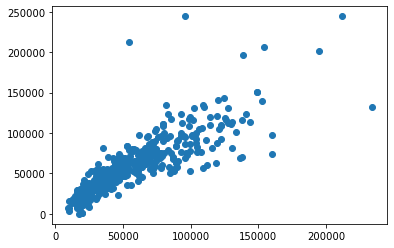

In [121]:
plt.scatter(y1_test, y1_pred_test)

In [122]:
print("Training result: ", r2_score(y1_train, y1_pred_train))
print("############"*10)

print("Test result: ", r2_score(y1_test, y1_pred_test))

Training result:  0.8070470766423634
########################################################################################################################
Test result:  0.6439790699308543


In [123]:
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_test))

MAE: 13835.187022491627


In [124]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test)))

RMSE: 21433.316791692574


In [125]:
print('MAPE:', metrics.mean_absolute_percentage_error(y1_test, y1_pred_test))

MAPE: 0.2583225009952021


In [126]:
###

# XGBoost

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.75,random_state = 101)

In [128]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [129]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [130]:
print("Training result: ", r2_score(y_train, y_pred_xgb_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_xgb_test))

Training result:  0.9890006029371634
########################################################################################################################
Test result:  0.7197982976326625


In [131]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb_test))

MAE: 11875.346128958972


In [132]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_test)))

RMSE: 18956.692229099433


In [133]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_xgb_test))

MAPE: 0.1986597840449327


In [134]:
####

# Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
y_pred_RF_train = RF.predict(x_train)
y_pred_RF_test = RF.predict(x_test)

In [137]:
print("Training result: ", r2_score(y_train, y_pred_RF_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_RF_test))

Training result:  0.9705318936480571
########################################################################################################################
Test result:  0.7679354235610057


In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_RF_test))

MAE: 11077.167360827878


In [139]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF_test)))

RMSE: 17251.688215083075


In [140]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF_test))

MAPE: 0.19626098569797326


In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [143]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [144]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [145]:

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [146]:

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [147]:
y_pred_new = rf_random.predict(x_test)

In [148]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_new))

Training result:  0.7991662002920554
########################################################################################################################
Test result:  0.7972601224089798


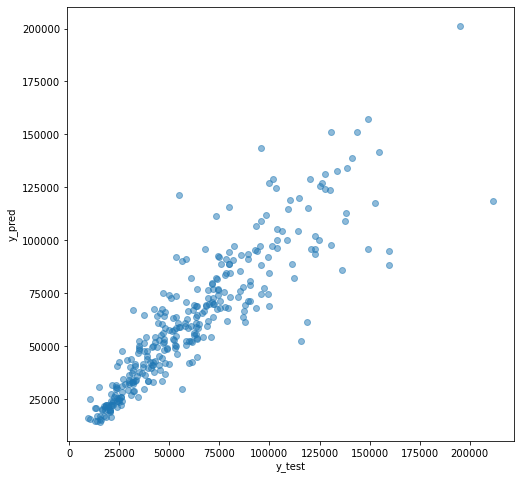

In [152]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_new, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [150]:
#RF Model with parameters set after Hyper-paramter Tuning will be used for prediction